# Objective-2 Time Invariant Face Recognition 

# Importing Libraries

In [46]:
import tensorflow as tf

In [1]:
# for reproducibility
import numpy as np
np.random.seed(1337) 

In [2]:
from keras.models import Sequential
from keras.callbacks import EarlyStopping,TensorBoard

from keras_preprocessing.image import ImageDataGenerator 
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import pandas as pd
import os ,PIL
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [43]:
from keras import metrics

# Mounting the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Location of folder with image data

In [15]:
data_folder_location='F:/Time-Invariant  aging model Final/Running objective-2 on local PC/fg'


# Data Preprocessing
## Putting all files into a single dataframe

In [ ]:
# to dismount drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
# Put all files into a single dataframe
list_dir = [i for i in os.listdir('/content/drive/My Drive/Aging model/datafiles')]
final_df = pd.DataFrame(columns=['ID','Facial Index','Mandibular Index','Intercantal Index','Orbital Width Index','Eye Fissure Index','Vermilion Height Index','Mouth Face Width Index','AGE'])
interim_df = pd.DataFrame(columns=['ID','Facial Index','Mandibular Index','Intercantal Index','Orbital Width Index','Eye Fissure Index','Vermilion Height Index','Mouth Face Width Index','AGE'])
age_list=list()
for d in list_dir:
    interim_df.at[0,  ['Facial Index','Mandibular Index','Intercantal Index','Orbital Width Index','Eye Fissure Index','Vermilion Height Index','Mouth Face Width Index']] = pd.read_csv('/content/drive/My Drive/Aging model/datafiles/'+d, sep=" ", header=None).values[0][:7]
    interim_df['AGE'] = int(d[4:].replace('.txt','').replace('a','').replace('b',''))
    interim_df['ID'] = int(d[:3])
    final_df = pd.concat([final_df,interim_df])
    
# sort values by age of same person
final_df = final_df.sort_values(['ID','AGE'],ascending=True)

In [ ]:
# #saving the dataframe
# final_df.to_csv('/content/drive/My Drive/Aging model/new/final_df.csv',index=False)

In [3]:
final_df=pd.read_csv('final_df.csv')

In [4]:
final_df.head()

,ID,Facial Index,Mandibular Index,Intercantal Index,Orbital Width Index,Eye Fissure Index,Vermilion Height Index,Mouth Face Width Index,AGE
0,1,0.806070,0.336661,0.390837,0.828399,0.521382,0.599030,0.346350,2
1,1,0.852819,0.442643,0.386980,0.774311,0.461004,0.659254,0.393676,5
2,1,0.877282,0.404491,0.442716,0.675757,0.358158,0.306820,0.384508,8
3,1,0.883831,0.395061,0.415456,0.698110,0.419721,0.409635,0.361281,10
4,1,0.892233,0.408905,0.421452,0.690838,0.414924,0.511849,0.428505,14


In [ ]:
final_df.tail()

,ID,Facial Index,Mandibular Index,Intercantal Index,Orbital Width Index,Eye Fissure Index,Vermilion Height Index,Mouth Face Width Index,AGE
997,82,0.971190,0.456241,0.431464,0.688562,0.362097,0.776495,0.421004,22
998,82,0.922055,0.457388,0.366031,0.807954,0.402890,0.800289,0.386978,23
999,82,0.948693,0.473651,0.409538,0.731037,0.290797,0.600109,0.465623,25
1000,82,0.914195,0.500786,0.416904,0.543606,0.480518,0.876548,0.394899,27
1001,82,0.915017,0.478165,0.404374,0.681841,0.316847,0.735635,0.450559,31


# Removing un necessary columns


In [ ]:
# removing the un necessary features
final_df.drop(final_df.columns[[1,2,3,4,5,6,7]], axis = 1, inplace = True) 

In [ ]:
final_df.head(3)

,ID,AGE
0,1,2
1,1,5
2,1,8


In [ ]:
final_df.tail(3)

,ID,AGE
999,82,25
1000,82,27
1001,82,31


## Class distribution

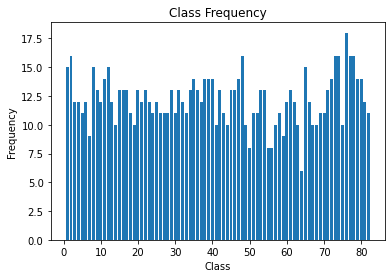

In [ ]:
classes=final_df[['ID']].values
unique, counts = np.unique(classes, return_counts=True)
plt.bar(unique,counts)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

## One hot encoding of the target labels

In [ ]:
# use pd.concat to join the new columns with your original dataframe
df = pd.concat([final_df['ID'],pd.get_dummies(final_df['ID'], prefix='person')],axis=1)

In [ ]:
#saving the dataframe
df.to_csv('/content/drive/My Drive/Aging model/new/df.csv',index=False)

In [5]:
df=pd.read_csv('df.csv')

In [6]:
df.head()

,ID,person_1,person_2,person_3,person_4,person_5,person_6,person_7,person_8,person_9,...,person_74,person_75,person_76,person_77,person_78,person_79,person_80,person_81,person_82,file_name
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,001A02.JPG
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,001A05.JPG
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,001A08.JPG
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,001A10.JPG
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,001A14.JPG


In [ ]:
df.tail()

,ID,person_1,person_2,person_3,person_4,person_5,person_6,person_7,person_8,person_9,person_10,person_11,person_12,person_13,person_14,person_15,person_16,person_17,person_18,person_19,person_20,person_21,person_22,person_23,person_24,person_25,person_26,person_27,person_28,person_29,person_30,person_31,person_32,person_33,person_34,person_35,person_36,person_37,person_38,person_39,...,person_44,person_45,person_46,person_47,person_48,person_49,person_50,person_51,person_52,person_53,person_54,person_55,person_56,person_57,person_58,person_59,person_60,person_61,person_62,person_63,person_64,person_65,person_66,person_67,person_68,person_69,person_70,person_71,person_72,person_73,person_74,person_75,person_76,person_77,person_78,person_79,person_80,person_81,person_82,file_name
997,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,082A22.JPG
998,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,082A23.JPG
999,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,082A25.JPG
1000,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,082A27.JPG
1001,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,082A31.JPG


In [ ]:
df.columns

Index(['ID', 'person_1', 'person_2', 'person_3', 'person_4', 'person_5',
       'person_6', 'person_7', 'person_8', 'person_9', 'person_10',
       'person_11', 'person_12', 'person_13', 'person_14', 'person_15',
       'person_16', 'person_17', 'person_18', 'person_19', 'person_20',
       'person_21', 'person_22', 'person_23', 'person_24', 'person_25',
       'person_26', 'person_27', 'person_28', 'person_29', 'person_30',
       'person_31', 'person_32', 'person_33', 'person_34', 'person_35',
       'person_36', 'person_37', 'person_38', 'person_39', 'person_40',
       'person_41', 'person_42', 'person_43', 'person_44', 'person_45',
       'person_46', 'person_47', 'person_48', 'person_49', 'person_50',
       'person_51', 'person_52', 'person_53', 'person_54', 'person_55',
       'person_56', 'person_57', 'person_58', 'person_59', 'person_60',
       'person_61', 'person_62', 'person_63', 'person_64', 'person_65',
       'person_66', 'person_67', 'person_68', 'person_69', 'person_

## Adding original image names to the dataframe
### Note : "fg" folder contains the 1002 images in .JPG format

In [ ]:
# addng file names to the dataframe as a new columns called 'fiale_name"
image_names=[]
for i in os.listdir('/content/drive/My Drive/Aging model/fg'):
  image_names.append(i)

In [ ]:
len(image_names)

1002

In [ ]:
df['file_name']=image_names

In [ ]:
df.head()

,ID,person_1,person_2,person_3,person_4,person_5,person_6,person_7,person_8,person_9,person_10,person_11,person_12,person_13,person_14,person_15,person_16,person_17,person_18,person_19,person_20,person_21,person_22,person_23,person_24,person_25,person_26,person_27,person_28,person_29,person_30,person_31,person_32,person_33,person_34,person_35,person_36,person_37,person_38,person_39,...,person_44,person_45,person_46,person_47,person_48,person_49,person_50,person_51,person_52,person_53,person_54,person_55,person_56,person_57,person_58,person_59,person_60,person_61,person_62,person_63,person_64,person_65,person_66,person_67,person_68,person_69,person_70,person_71,person_72,person_73,person_74,person_75,person_76,person_77,person_78,person_79,person_80,person_81,person_82,file_name
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,006A36.JPG
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,005A30.JPG
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,001A02.JPG
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,001A10.JPG
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,001A16.JPG


In [ ]:
df=df.sort_values('file_name')

In [ ]:
df.tail(20)

,ID,person_1,person_2,person_3,person_4,person_5,person_6,person_7,person_8,person_9,person_10,person_11,person_12,person_13,person_14,person_15,person_16,person_17,person_18,person_19,person_20,person_21,person_22,person_23,person_24,person_25,person_26,person_27,person_28,person_29,person_30,person_31,person_32,person_33,person_34,person_35,person_36,person_37,person_38,person_39,...,person_44,person_45,person_46,person_47,person_48,person_49,person_50,person_51,person_52,person_53,person_54,person_55,person_56,person_57,person_58,person_59,person_60,person_61,person_62,person_63,person_64,person_65,person_66,person_67,person_68,person_69,person_70,person_71,person_72,person_73,person_74,person_75,person_76,person_77,person_78,person_79,person_80,person_81,person_82,file_name
980,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,081A03.JPG
979,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,081A04.JPG
969,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,081A05.JPG
971,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,081A06.JPG
982,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,081A07.JPG
983,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,081A08.JPG
984,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,081A10.JPG
986,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,081A11.JPG
985,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,081A12.JPG
988,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,082A00.JPG


In [ ]:
# # saving the above dataframe as csv
# df.to_csv('/content/drive/My Drive/Aging model/new/df.csv',index=False)

In [ ]:
df=pd.read_csv('df.csv')

# Splitting data in training and validation sets

In [ ]:
 train_size = len(df['ID'].unique()) * .8
train = pd.DataFrame()
valid = pd.DataFrame()
for n,i in enumerate(df['ID'].unique()):
    if n< train_size:
        train = pd.concat([train, df[df['ID']==i]])
    else:
        valid = pd.concat([valid, df[df['ID']==i]])
 

In [ ]:
print('Training Set Has: ' + str(len(train.groupby('ID').count())) + ' people')
print('Validation  Set Has: ' + str(len(valid.groupby('ID').count())) + ' people')

Training Set Has: 66 people
Validation  Set Has: 16 people


In [ ]:
train.head()

,ID,person_1,person_2,person_3,person_4,person_5,person_6,person_7,person_8,person_9,person_10,person_11,person_12,person_13,person_14,person_15,person_16,person_17,person_18,person_19,person_20,person_21,person_22,person_23,person_24,person_25,person_26,person_27,person_28,person_29,person_30,person_31,person_32,person_33,person_34,person_35,person_36,person_37,person_38,person_39,...,person_44,person_45,person_46,person_47,person_48,person_49,person_50,person_51,person_52,person_53,person_54,person_55,person_56,person_57,person_58,person_59,person_60,person_61,person_62,person_63,person_64,person_65,person_66,person_67,person_68,person_69,person_70,person_71,person_72,person_73,person_74,person_75,person_76,person_77,person_78,person_79,person_80,person_81,person_82,file_name
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,001A02.JPG
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,001A05.JPG
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,001A08.JPG
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,001A10.JPG
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,001A14.JPG


In [ ]:
valid.tail()

,ID,person_1,person_2,person_3,person_4,person_5,person_6,person_7,person_8,person_9,person_10,person_11,person_12,person_13,person_14,person_15,person_16,person_17,person_18,person_19,person_20,person_21,person_22,person_23,person_24,person_25,person_26,person_27,person_28,person_29,person_30,person_31,person_32,person_33,person_34,person_35,person_36,person_37,person_38,person_39,...,person_44,person_45,person_46,person_47,person_48,person_49,person_50,person_51,person_52,person_53,person_54,person_55,person_56,person_57,person_58,person_59,person_60,person_61,person_62,person_63,person_64,person_65,person_66,person_67,person_68,person_69,person_70,person_71,person_72,person_73,person_74,person_75,person_76,person_77,person_78,person_79,person_80,person_81,person_82,file_name
997,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,082A22.JPG
998,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,082A23.JPG
999,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,082A25.JPG
1000,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,082A27.JPG
1001,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,082A31.JPG


# Preparing Test data

In [ ]:
# The unique ID of persons in train dataframe
np.unique(train.ID.values)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66])

In [ ]:
# taking data of 8 person out from the training dataframe to use in test data
test_ids= [ 34,35, 36, 37, 38, 39, 40, 41] 

In [ ]:
# selecting rows based on condition 
test= train[train['ID'].isin(test_ids)] 
test.head(3)

,ID,person_1,person_2,person_3,person_4,person_5,person_6,person_7,person_8,person_9,person_10,person_11,person_12,person_13,person_14,person_15,person_16,person_17,person_18,person_19,person_20,person_21,person_22,person_23,person_24,person_25,person_26,person_27,person_28,person_29,person_30,person_31,person_32,person_33,person_34,person_35,person_36,person_37,person_38,person_39,...,person_44,person_45,person_46,person_47,person_48,person_49,person_50,person_51,person_52,person_53,person_54,person_55,person_56,person_57,person_58,person_59,person_60,person_61,person_62,person_63,person_64,person_65,person_66,person_67,person_68,person_69,person_70,person_71,person_72,person_73,person_74,person_75,person_76,person_77,person_78,person_79,person_80,person_81,person_82,file_name
404,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,034A02.JPG
405,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,034A04.JPG
406,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,034A11.JPG


In [ ]:
print(train.shape, valid.shape,test.shape )

(790, 84) (212, 84) (104, 84)


In [ ]:
# removing the Test IDs from the Traind data
# removing 34,35, 36, 37, 38, 39, 40, 41 indices
train_ids=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '42', '43', '44', '45', '46', '47',
       '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59',
       '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71',
       '72', '73', '74', '75', '76', '77', '78', '79', '80', '81']

In [ ]:
train= train[train['ID'].isin(train_ids)] 
train.head()

,ID,person_1,person_2,person_3,person_4,person_5,person_6,person_7,person_8,person_9,person_10,person_11,person_12,person_13,person_14,person_15,person_16,person_17,person_18,person_19,person_20,person_21,person_22,person_23,person_24,person_25,person_26,person_27,person_28,person_29,person_30,person_31,person_32,person_33,person_34,person_35,person_36,person_37,person_38,person_39,...,person_44,person_45,person_46,person_47,person_48,person_49,person_50,person_51,person_52,person_53,person_54,person_55,person_56,person_57,person_58,person_59,person_60,person_61,person_62,person_63,person_64,person_65,person_66,person_67,person_68,person_69,person_70,person_71,person_72,person_73,person_74,person_75,person_76,person_77,person_78,person_79,person_80,person_81,person_82,file_name
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,001A02.JPG
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,001A05.JPG
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,001A08.JPG
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,001A10.JPG
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,001A14.JPG


In [ ]:
print(train.shape, valid.shape,test.shape )

(686, 84) (212, 84) (104, 84)


In [ ]:
print('Training    Set Has: ' + str(len(train.groupby('ID').count())) + ' people')
print('Validation  Set Has: ' + str(len(valid.groupby('ID').count())) + ' people')
print('.....Test   Set Has:  ' + str(len(test.groupby('ID').count())) + ' people')

Training    Set Has: 58 people
Validation  Set Has: 16 people
.....Test   Set Has:  8 people


## Saving results of Training, Validation and Testing Data

In [ ]:

train.to_csv('/content/drive/My Drive/Aging model/new/train.csv',index=False)
valid.to_csv('/content/drive/My Drive/Aging model/new/valid.csv',index=False)
test.to_csv('/content/drive/My Drive/Aging model/new/test.csv',index=False)

In [7]:
train=pd.read_csv('train.csv')
valid=pd.read_csv('valid.csv')
test=pd.read_csv('test.csv')

In [8]:
print(train.shape,valid.shape,test.shape)

(686, 84) (212, 84) (104, 84)


# Taking out two photos for prediction

# Function to find the index of images

In [22]:
def getIndexes(dfObj, value):
    ''' Get index positions of value in dataframe i.e. dfObj.'''
    listOfPos = list()
    # Get bool dataframe with True at positions where the given value exists
    result = dfObj.isin([value])
    # Get list of columns that contains the value
    seriesObj = result.any()
    columnNames = list(seriesObj[seriesObj == True].index)
    # Iterate over list of columns and fetch the rows indexes where value exists
    for col in columnNames:
        rows = list(result[col][result[col] == True].index)
        for row in rows:
            listOfPos.append((row, col))
    # Return a list of tuples indicating the positions of value in the dataframe
    return listOfPos

#  For testing purpose ,dropping images 057A17.JPG ,032A18.JPG
# Class Number of these images=57 and 10 respectively

In [16]:
image_path_1=data_folder_location + '/057A17.JPG'
image_path_2=data_folder_location + '/032A18.JPG'

Populating the interactive namespace from numpy and matplotlib


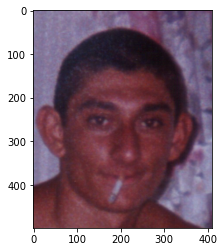

In [17]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread(image_path_1)
imgplot = plt.imshow(img)
plt.show()

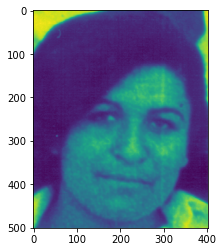

In [18]:
img=mpimg.imread(image_path_2)
imgplot = plt.imshow(img)
plt.show()

## Get index of 1st image

In [23]:
getIndexes(train, '057A17.JPG')

[(582, 'file_name')]

## Get index of 2nd image

In [24]:
getIndexes(train ,'032A18.JPG')

[(386, 'file_name')]

In [ ]:
train2=train

# Removing Both the images (for prediction) from the Training Set

In [ ]:
train2.drop([582,386],inplace=True)

In [ ]:
train2.shape

(684, 84)

### Saving the new Train data (without the 2 images)

In [ ]:
train2.to_csv('/content/drive/My Drive/Aging model/new/train2.csv',index=False)

In [27]:
test=pd.read_csv('test.csv')

In [25]:
train2=pd.read_csv('train2.csv')

In [28]:
print('Training    Set Has: ' + str(len(train2.groupby('ID').count())) + ' people')
print('Validation  Set Has: ' + str(len(valid.groupby('ID').count())) + ' people')
print('.....Test   Set Has:  ' + str(len(test.groupby('ID').count())) + ' people')

Training    Set Has: 58 people
Validation  Set Has: 16 people
.....Test   Set Has:  8 people


## Target Labels

In [ ]:
train2.columns

Index(['ID', 'person_1', 'person_2', 'person_3', 'person_4', 'person_5',
       'person_6', 'person_7', 'person_8', 'person_9', 'person_10',
       'person_11', 'person_12', 'person_13', 'person_14', 'person_15',
       'person_16', 'person_17', 'person_18', 'person_19', 'person_20',
       'person_21', 'person_22', 'person_23', 'person_24', 'person_25',
       'person_26', 'person_27', 'person_28', 'person_29', 'person_30',
       'person_31', 'person_32', 'person_33', 'person_34', 'person_35',
       'person_36', 'person_37', 'person_38', 'person_39', 'person_40',
       'person_41', 'person_42', 'person_43', 'person_44', 'person_45',
       'person_46', 'person_47', 'person_48', 'person_49', 'person_50',
       'person_51', 'person_52', 'person_53', 'person_54', 'person_55',
       'person_56', 'person_57', 'person_58', 'person_59', 'person_60',
       'person_61', 'person_62', 'person_63', 'person_64', 'person_65',
       'person_66', 'person_67', 'person_68', 'person_69', 'person_

In [29]:
target_columns=['person_1', 'person_2', 'person_3', 'person_4', 'person_5',
       'person_6', 'person_7', 'person_8', 'person_9', 'person_10',
       'person_11', 'person_12', 'person_13', 'person_14', 'person_15',
       'person_16', 'person_17', 'person_18', 'person_19', 'person_20',
       'person_21', 'person_22', 'person_23', 'person_24', 'person_25',
       'person_26', 'person_27', 'person_28', 'person_29', 'person_30',
       'person_31', 'person_32', 'person_33', 'person_34', 'person_35',
       'person_36', 'person_37', 'person_38', 'person_39', 'person_40',
       'person_41', 'person_42', 'person_43', 'person_44', 'person_45',
       'person_46', 'person_47', 'person_48', 'person_49', 'person_50',
       'person_51', 'person_52', 'person_53', 'person_54', 'person_55',
       'person_56', 'person_57', 'person_58', 'person_59', 'person_60',
       'person_61', 'person_62', 'person_63', 'person_64', 'person_65',
       'person_66', 'person_67', 'person_68', 'person_69', 'person_70',
       'person_71', 'person_72', 'person_73', 'person_74', 'person_75',
       'person_76', 'person_77', 'person_78', 'person_79', 'person_80',
       'person_81', 'person_82']

# **Further Processing for developing Deep Leartning Model**

## **First doing Face Augmentation only for the Train Data**

In [65]:
## Defining Augmentation object using ImageDataGenerator
TRAIN_DATAGEN = ImageDataGenerator(
rescale=1./255,
rotation_range=-40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)

## Train generator

In [66]:
train_generator=TRAIN_DATAGEN.flow_from_dataframe(
dataframe=train2,
directory=data_folder_location,
x_col='file_name',
y_col=target_columns,
batch_size=32,
seed=42,
#new
color_mode="rgb",
shuffle=True,class_mode='raw',
target_size=(150,150))

Found 684 validated image filenames.


## Validation generator

In [67]:
valid_datagen = ImageDataGenerator(rescale=1./255)

valid_generator=valid_datagen.flow_from_dataframe(
dataframe=valid,
directory=data_folder_location,
x_col='file_name',
y_col=target_columns,
batch_size=32,
seed=42,
#new
color_mode="rgb",
shuffle=True,class_mode='raw',
target_size=(150,150))
#note use Shuffle false to get reproducable results

Found 212 validated image filenames.


##  Test generator



In [68]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator=test_datagen.flow_from_dataframe(
dataframe=test,
directory=data_folder_location,
x_col='file_name',
y_col=target_columns,
batch_size=32,
seed=42,
#new
color_mode="rgb",
shuffle=True,class_mode='raw',
target_size=(150,150))
#note use Shuffle false to get reproducable results

Found 104 validated image filenames.


# **Buidling Convlutional Network Model**

In [69]:
# adding regularization
from keras.regularizers import l2
from keras.layers.advanced_activations import LeakyReLU
act = LeakyReLU(alpha=0.1)

# The Model

In [70]:
## 
model6 =Sequential()

model6.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model6.add(act)
model6.add(MaxPooling2D((2, 2)))
model6.add(Dropout(0.2))


model6.add(Conv2D(64, (3, 3)))
model6.add(act)
model6.add(MaxPooling2D((2, 2)))
model6.add(Dropout(0.2))


#model6.add(Conv2D(128, (3,3), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model6.add(Conv2D(128, (3, 3)))
model6.add(act)
model6.add(MaxPooling2D((2, 2)))
model6.add(Dropout(0.2))


#model6.add(Conv2D(128, (3,3), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model6.add(Conv2D(128, (3, 3)))
model6.add(act)
model6.add(MaxPooling2D((2, 2)))
model6.add(Dropout(0.2))


model6.add(Conv2D(256, (3, 3)))
model6.add(act)
model6.add(MaxPooling2D((2, 2)))
model6.add(Dropout(0.2))

model6.add(Flatten())
model6.add(Dropout(0.2))
model6.add(Dense(512))
model6.add(act)
model6.add(Dense(82, activation='sigmoid'))


# Summary of the Model 

In [39]:
model6.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    multiple                  0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 36, 36, 64)       

## Compiling Model

In [71]:
# model6.compile(loss='binary_crossentropy',
# optimizer=optimizers.Adam(learning_rate=1e-5),
# metrics=[metrics.Accuracy(),metrics.Precision()])
model6.compile(loss='binary_crossentropy',
optimizer=optimizers.Adam(learning_rate=1e-5),
metrics=['accuracy'])

# **Training Begins**

In [72]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size

history=model6.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=12 
                   
)

Epoch 1/12
21/21 [==============================] - 56s 3s/step - loss: 0.6849 - accuracy: 0.5449 - val_loss: 0.6873 - val_accuracy: 0.6408
Epoch 2/12
21/21 [==============================] - 54s 3s/step - loss: 0.6563 - accuracy: 0.6798 - val_loss: 0.6771 - val_accuracy: 0.8108
Epoch 3/12
21/21 [==============================] - 60s 3s/step - loss: 0.6109 - accuracy: 0.7876 - val_loss: 0.6563 - val_accuracy: 0.8751
Epoch 4/12
21/21 [==============================] - 57s 3s/step - loss: 0.5300 - accuracy: 0.8682 - val_loss: 0.6110 - val_accuracy: 0.9354
Epoch 5/12
21/21 [==============================] - 55s 3s/step - loss: 0.4076 - accuracy: 0.9252 - val_loss: 0.5160 - val_accuracy: 0.9636
Epoch 6/12
21/21 [==============================] - 59s 3s/step - loss: 0.2670 - accuracy: 0.9624 - val_loss: 0.4081 - val_accuracy: 0.9877
Epoch 7/12
21/21 [==============================] - 54s 3s/step - loss: 0.1556 - accuracy: 0.9826 - val_loss: 0.2930 - val_accuracy: 0.9878
Epoch 8/12
21/21 [==

# Saving the Model

In [ ]:
model_path='/content/drive/My Drive/Aging model/new/model_july30.h5'
# saving model
model6.save(model_path)

# Newwwwwwwwwwwwwww

In [47]:
class CategoricalTruePositives(metrics.Metric):
    def __init__(self, name="categorical_true_positives", **kwargs):
        super(CategoricalTruePositives, self).__init__(name=name, **kwargs)
        self.true_positives = self.add_weight(name="ctp", initializer="zeros")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred = tf.reshape(tf.argmax(y_pred, axis=1), shape=(-1, 1))
        values = tf.cast(y_true, "int32") == tf.cast(y_pred, "int32")
        values = tf.cast(values, "float32")
        if sample_weight is not None:
            sample_weight = tf.cast(sample_weight, "float32")
            values = tf.multiply(values, sample_weight)
        self.true_positives.assign_add(tf.reduce_sum(values))

    def result(self):
        return self.true_positives

    def reset_states(self):
        # The state of the metric will be reset at the start of each epoch.
        self.true_positives.assign(0.0)


#model6 = get_uncompiled_model()
model6.compile(
    optimizer=optimizers.Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=[CategoricalTruePositives()],
)



In [48]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size

history=model6.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=12 
                   
)

Epoch 1/12
21/21 [==============================] - 63s 3s/step - loss: 0.6937 - categorical_true_positives: 0.0000e+00 - val_loss: 0.6904 - val_categorical_true_positives: 0.0000e+00
Epoch 2/12
21/21 [==============================] - 56s 3s/step - loss: 0.6682 - categorical_true_positives: 0.0000e+00 - val_loss: 0.6826 - val_categorical_true_positives: 0.0000e+00
Epoch 3/12
21/21 [==============================] - 57s 3s/step - loss: 0.6293 - categorical_true_positives: 0.0000e+00 - val_loss: 0.6665 - val_categorical_true_positives: 0.0000e+00
Epoch 4/12
21/21 [==============================] - 56s 3s/step - loss: 0.5570 - categorical_true_positives: 0.0000e+00 - val_loss: 0.6270 - val_categorical_true_positives: 0.0000e+00
Epoch 5/12
21/21 [==============================] - 59s 3s/step - loss: 0.4359 - categorical_true_positives: 0.0000e+00 - val_loss: 0.5466 - val_categorical_true_positives: 0.0000e+00
Epoch 6/12


KeyboardInterrupt: 

# End Newwwwwwwwww

# Loading the Saved Model

In [ ]:
from keras.models import load_model 
model_path='/content/drive/My Drive/Aging model/new/model_july30.h5'
loaded_model = load_model(model_path) 

# Saving Losses and Accuracy History Parameters of the Model

In [ ]:
import json
# Get the dictionary containing each metric and the loss for each epoch
history_dict = history.history
# Save it under the form of a json file
history_path='/content/drive/My Drive/Aging model/new/history_july30.json'
json.dump(str(history_dict), open(history_path, 'w'))

In [ ]:
model_path='/content/drive/My Drive/Aging model/new/model_july30.h5'

# Loading History

In [ ]:
import json
history_path='/content/drive/My Drive/Aging model/new/history_july30.json'
history= json.load(open(history_path, 'r'))

In [ ]:
# The loaded history is in String format.Converting it back to
# dictionary
import ast
history_1=ast.literal_eval(history)

# **Plotting Losses and Accuracy History of the Model**

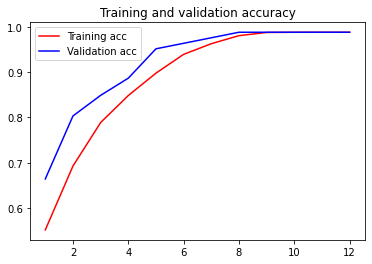

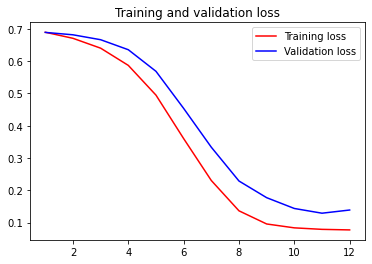

In [ ]:
### .
acc = history_1['accuracy']
val_acc = history_1['val_accuracy']
loss = history_1['loss']
val_loss = history_1['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## **Model Evaluation on un seen data** (i.e Test Data)

In [ ]:
score=model6.evaluate_generator(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1990976333618164
Test accuracy: 0.9878048300743103


# We can see that we have 98% accuracy and 10% losses on the unseen data (i.e The Test data)

# *xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx*

# *xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx*

# **Predictions**

# Prediction of Classes for the 2 Images taken out before training

In [ ]:
image_path_1=data_folder_location + '/057A17.JPG'
image_path_2=data_folder_location + '/032A18.JPG'

# Predicting class for 057A17.JPG (which has Class=57)

Populating the interactive namespace from numpy and matplotlib


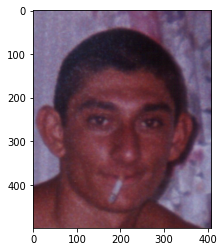

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread(image_path_1)
imgplot = plt.imshow(img)
plt.show()

In [ ]:
from keras_preprocessing import image

In [ ]:
test_image = image.load_img(image_path_1, target_size=(150, 150))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis=0)
test_generator.reset()

prediction = loaded_model.predict(test_image)


np.argmax(prediction, axis=1)

array([57])

# The Prediction for the un seen image 057A17.JPG of Class 57 is correct as 57 

# Predicting class for 032A18.JPG (which has Class=32)

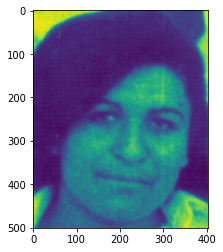

In [ ]:
img=mpimg.imread(image_path_2)
imgplot = plt.imshow(img)
plt.show()

In [ ]:
test_image = image.load_img(image_path_2, target_size=(150, 150))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis=0)
test_generator.reset()

prediction = loaded_model.predict(test_image)


np.argmax(prediction, axis=1)

array([32])

# The Prediction for the un seen image 032A18.JPG of Class 32 is correct as 32 